In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/var/folders/c2/gcn21r4d0131yjb2dvjgy9w40000gn/T/ipykernel_10856/265554930.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
pd.set_option('display.max_columns', None)

pd.options.display.float_format = '{:.3f}'.format

sns.set_style("whitegrid")

### Load the data

In [3]:
training_values = pd.read_csv("training_set_values.csv")
training_labels = pd.read_csv("training_set_labels.csv")
test_values = pd.read_csv("test_set_values.csv")

In [4]:
training_values.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.000,2011-03-14,Roman,1390,Roman,34.938,-9.856,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.000,2013-03-06,Grumeti,1399,GRUMETI,34.699,-2.147,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.000,2013-02-25,Lottery Club,686,World vision,37.461,-3.821,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.000,2013-01-28,Unicef,263,UNICEF,38.486,-11.155,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.000,2011-07-13,Action In A,0,Artisan,31.131,-1.825,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [5]:
training_labels.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


Merge training values with training labels to create a single train dataset.

In [6]:
train = training_values.merge(training_labels, on='id')
train.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.000,2011-03-14,Roman,1390,Roman,34.938,-9.856,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.000,2013-03-06,Grumeti,1399,GRUMETI,34.699,-2.147,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.000,2013-02-25,Lottery Club,686,World vision,37.461,-3.821,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.000,2013-01-28,Unicef,263,UNICEF,38.486,-11.155,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.000,2011-07-13,Action In A,0,Artisan,31.131,-1.825,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


## EDA

### Duplicates

In [7]:
train.duplicated().sum()

0

We can see that there are no duplicate records in the train dataset.

### Shape

In [8]:
train.shape

(59400, 41)

There are 59,400 rows of unique data in the train dataset. 

There are 41 columns. 

### Columns

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55763 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59398 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

Looking at the columns/variables, we can see that a large amount are non-numerical. We can also see that there are quite a few columns with missing values, which we will deal with during data preprocessing.

### Numerical data overview

In [10]:
train.select_dtypes(include=[np.number]).isna().sum()

id                   0
amount_tsh           0
gps_height           0
longitude            0
latitude             0
num_private          0
region_code          0
district_code        0
population           0
construction_year    0
dtype: int64

In [11]:
train.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000,59400.000,59400.000,59400.000,59400.000,59400.000,59400.000,59400.000,59400.000,59400.000
mean,37115.132,317.650,668.297,34.077,-5.706,0.474,15.297,5.630,179.910,1300.652
std,21453.128,2997.575,693.116,6.567,2.946,12.236,17.587,9.634,471.482,951.621
min,0.000,0.000,-90.000,0.000,-11.649,0.000,1.000,0.000,0.000,0.000
25%,18519.750,0.000,0.000,33.090,-8.541,0.000,5.000,2.000,0.000,0.000
50%,37061.500,0.000,369.000,34.909,-5.022,0.000,12.000,3.000,25.000,1986.000
75%,55656.500,20.000,1319.250,37.178,-3.326,0.000,17.000,5.000,215.000,2004.000
max,74247.000,350000.000,2770.000,40.345,-0.000,1776.000,99.000,80.000,30500.000,2013.000


Observations:
- There are no missing values in the numerical column data, but there are a lot of 0 values.
- There is a longitude of 0, which is impossible in Tanzania. This leads to the conclusion that some missing values are imputed with zero.
- The columns *amount_tsh* and *num_private* are majority zero values. For *amount_tsh* over 50% of values are 0, and for *num_private*, over 75% values are zero.
- The following columns need to be investigated for outliers: *amount_tsh*, *gps_height*, *population*
- Columns like *id*, *region_code*, *district_code*, and *num_private* should probably be treated as categorical variables, not numerical.

In [12]:
train[["id", "num_private", "region_code", "district_code"]] = train[["id", "num_private", "region_code", "district_code"]].astype(object)

In [13]:
train.describe()

,amount_tsh,gps_height,longitude,latitude,population,construction_year
count,59400.000,59400.000,59400.000,59400.000,59400.000,59400.000
mean,317.650,668.297,34.077,-5.706,179.910,1300.652
std,2997.575,693.116,6.567,2.946,471.482,951.621
min,0.000,-90.000,0.000,-11.649,0.000,0.000
25%,0.000,0.000,33.090,-8.541,0.000,0.000
50%,0.000,369.000,34.909,-5.022,25.000,1986.000
75%,20.000,1319.250,37.178,-3.326,215.000,2004.000
max,350000.000,2770.000,40.345,-0.000,30500.000,2013.000


This leaves us with 6 numerical columns and 35 categorical columns. Now, let's look at the categorical data.

### Categorical data overview

In [14]:
train[train.select_dtypes(include=['object']).columns].isna().sum()

id                           0
date_recorded                0
funder                    3637
installer                 3655
wpt_name                     2
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
public_meeting            3334
recorded_by                  0
scheme_management         3878
scheme_name              28810
permit                    3056
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_group                0
quantity                     0
quantity_group               0
source                       0
source_type                  0
source_class                 0
waterpoi

In [15]:
train.describe(include='object')

,id,date_recorded,funder,installer,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,public_meeting,recorded_by,scheme_management,scheme_name,permit,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
count,59400,59400,55763,55745,59398,59400,59400,59029,59400,59400,59400,59400,59400,56066,59400,55522,30590,56344,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400
unique,59400,356,1896,2145,37399,65,9,19287,21,27,20,125,2092,2,1,11,2695,2,18,13,7,12,5,7,7,8,6,5,5,10,7,3,7,6,3
top,69572,2011-03-15,Government Of Tanzania,DWE,none,0,Lake Victoria,Madukani,Iringa,11,1,Njombe,Igosi,True,GeoData Consultants Ltd,VWC,K,True,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
freq,1,572,9084,17402,3563,58643,10248,508,5294,5300,12203,2503,307,51011,59400,36793,682,38852,26780,26780,26780,40507,52490,25348,25348,50818,50818,33186,33186,17021,17021,45794,28522,34625,32259


Observations:
- The following columns have high cardinality: *funder*, *wpt_name*, *subvillage*, *scheme_name*
- Only one column contains one unique value (public_meeting), so this column can be discarded.
- 8 columns contain missing values.

### Distribution of categorical features
Now, we will visualise the distribution of values in each variable using countplots. We will not do this for variables that have high cardinality, as it would not be easy to visualise on a plot.

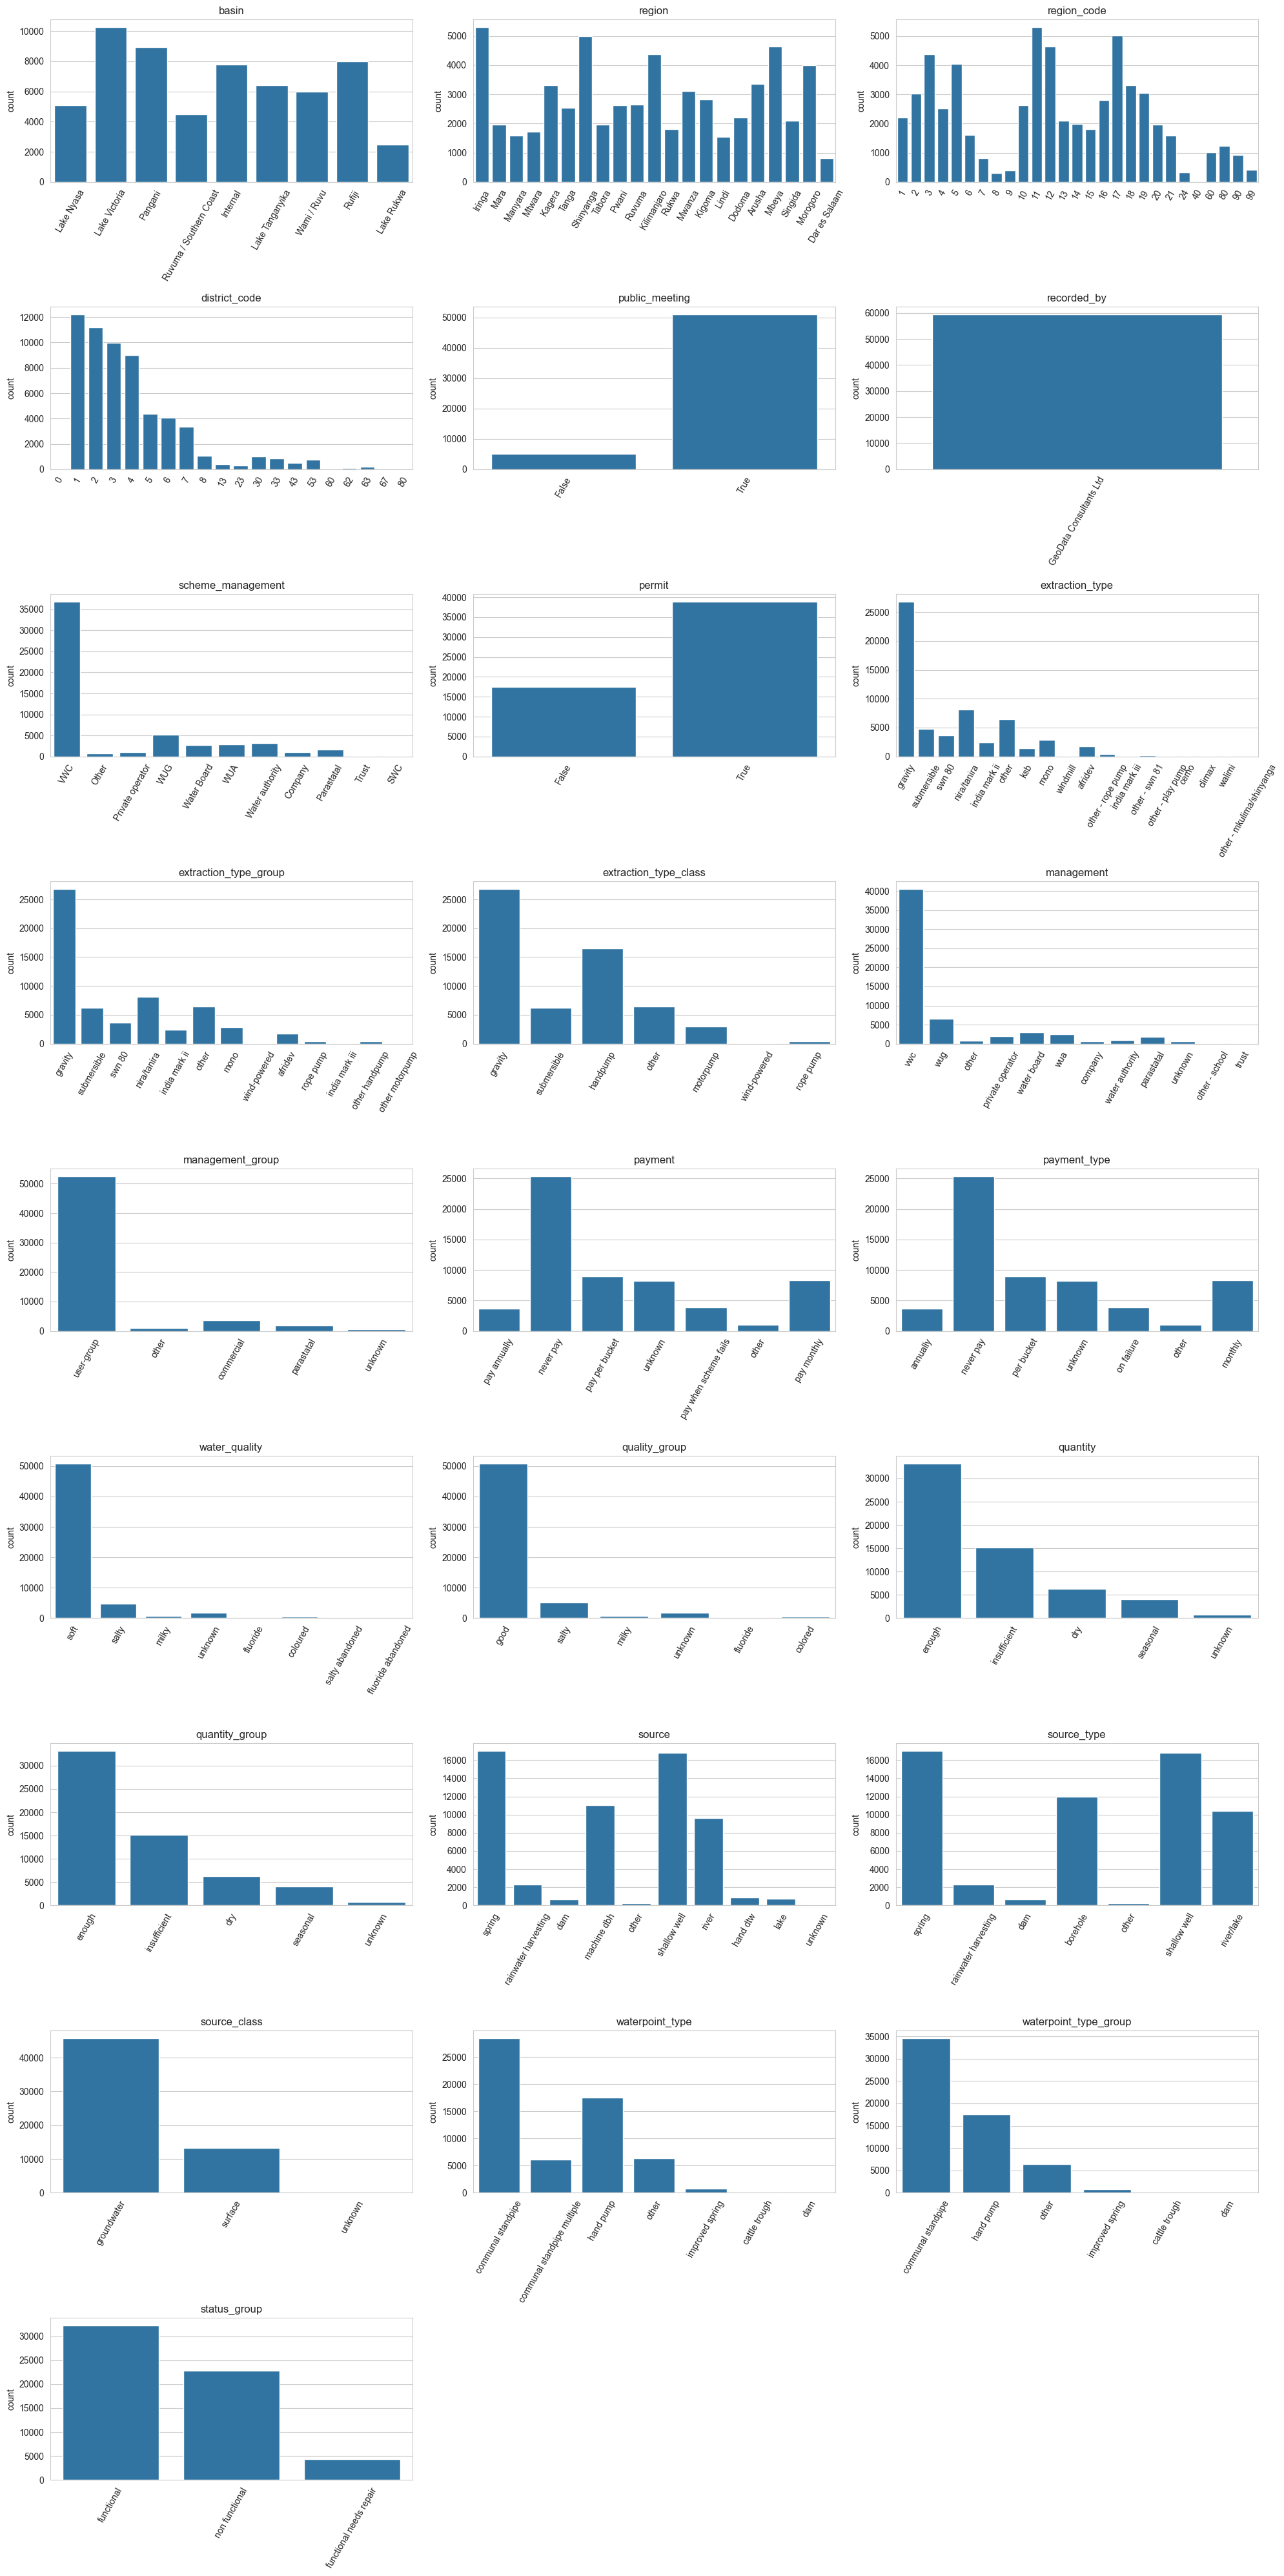

In [16]:
low_cardinality_variables = [col for col in train.columns if train[col].nunique() < 50]

plt.figure(figsize=(20, 40))

for i, col in enumerate(low_cardinality_variables):
    plt.subplot((len(low_cardinality_variables) + 2) // 3, 3, i+1)
    sns.countplot(x=col, data=train)
    plt.title(f"{col}")
    plt.xticks(rotation=60)
    plt.xlabel("")
    plt.tight_layout()

plt.show()


Observations:
- *quantity* and *quantity_group* appear to be the exact same, so one needs to be removed.
- *waterpoint_type* is the exact same as *waterpoint_type_group*, except it has broken down communal standpipe into two: *communal standpipe* and *communal standpipe multiple*. We will need to determine which one to keep.
- *water_quality* and *quality_group* are also similar variables, from this we can see that soft = good, and *water_quality* contains two extra value types (*salty abandoned* and *fluoride abandoned*).
- *extraction_type*, *extraction_type_group*, and *extraction_type_class* are also similar. *extraction_type_class* seems to merge values into broarder categories and therefore contains the fewest values. This one seems like the best one to keep out of the 3.
- *scheme_management* and *management* are largely the same, both will not be needed.
- There are more region codes than region names.
- Confirms that we can drop *recorded_by*, since it only has one value.

### Date recorded variable
We can see from earlier that *date_recorded* is an object type, and we want to convert this to a datetime format.

In [17]:
train["id"].dtype

dtype('O')

In [18]:
train["date_recorded"] = pd.to_datetime(train["date_recorded"])

In [19]:
train["date_recorded"].describe()

count                            59400
mean     2012-03-29 09:11:33.818181888
min                2002-10-14 00:00:00
25%                2011-04-01 00:00:00
50%                2012-10-10 00:00:00
75%                2013-02-09 00:00:00
max                2013-12-03 00:00:00
Name: date_recorded, dtype: object

We can see that the training data consists of pumps recorded between 2002 and 2013. There appear to be no missing values and no outliers or anomalous data.

#### Visualising number of records per year

In [20]:
train["year"] = train["date_recorded"].dt.year

train["year"].value_counts().sort_index()

year
2002        1
2004       30
2011    28674
2012     6424
2013    24271
Name: count, dtype: int64

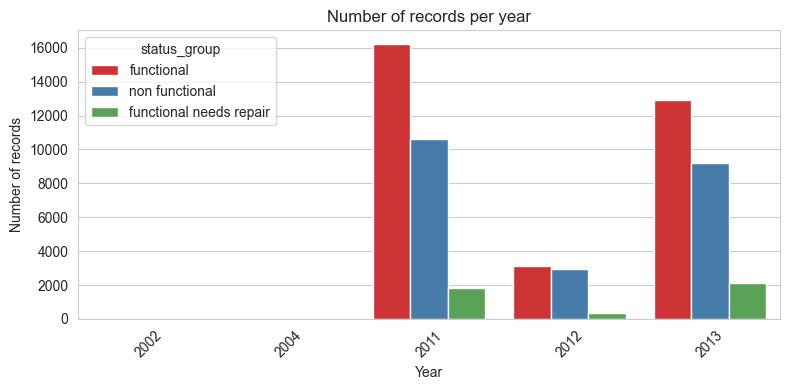

In [21]:
plt.figure(figsize=(8, 4))

sns.countplot(x="year", data=train, palette="Set1", hue="status_group")
plt.title("Number of records per year")
plt.xlabel("Year")
plt.ylabel("Number of records")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

From this, we can see that the training data only has records in 2002, 2004, 2011, 2012, and 2013. Majority of these records are from 2011, 2012, and 2013. 

In [22]:
train.drop("year", axis=1, inplace=True)

#### Visualising number of records per month

In [23]:
train["month"] = train["date_recorded"].dt.month

train["month"].value_counts().sort_index()

month
1      6354
2     12402
3     17936
4      3970
5       336
6       346
7      6928
8      3364
9       328
10     5466
11     1349
12      621
Name: count, dtype: int64

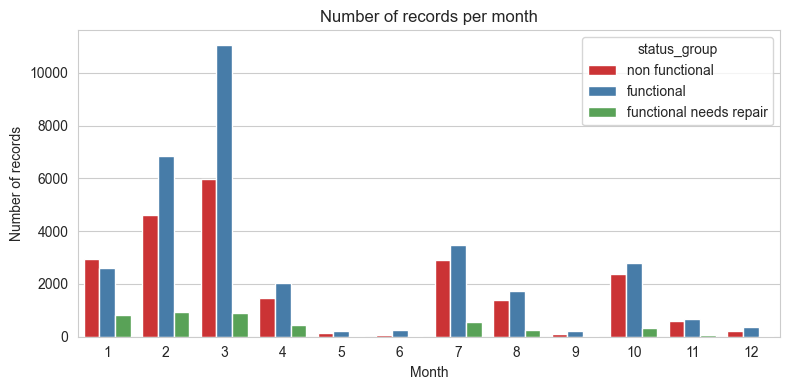

In [24]:
plt.figure(figsize=(8, 4))

sns.countplot(x="month", data=train, palette="Set1", hue="status_group")
plt.title("Number of records per month")
plt.xlabel("Month")
plt.ylabel("Number of records")
plt.tight_layout()
plt.show()

From this, we can see that most records are from February and March, and the least are from May, June, September, and December. In general, the earlier months of the year tend to have more records. 

In [25]:
train.drop("month", axis=1, inplace=True)

From this we can say that the date the data was recorded has no correlation with the status of the water pump, so we can drop this column.

### Installer and Funder variables
We can see from before that these two variables have high cardinality (a lot of unique values). For each, we will inspect the 10 most common values initially. 

##### Installer

In [26]:
train["installer"].describe()

count     55745
unique     2145
top         DWE
freq      17402
Name: installer, dtype: object

In [27]:
train["installer"].value_counts().head(10)

installer
DWE                   17402
Government             1825
RWE                    1206
Commu                  1060
DANIDA                 1050
KKKT                    898
Hesawa                  840
0                       777
TCRS                    707
Central government      622
Name: count, dtype: int64

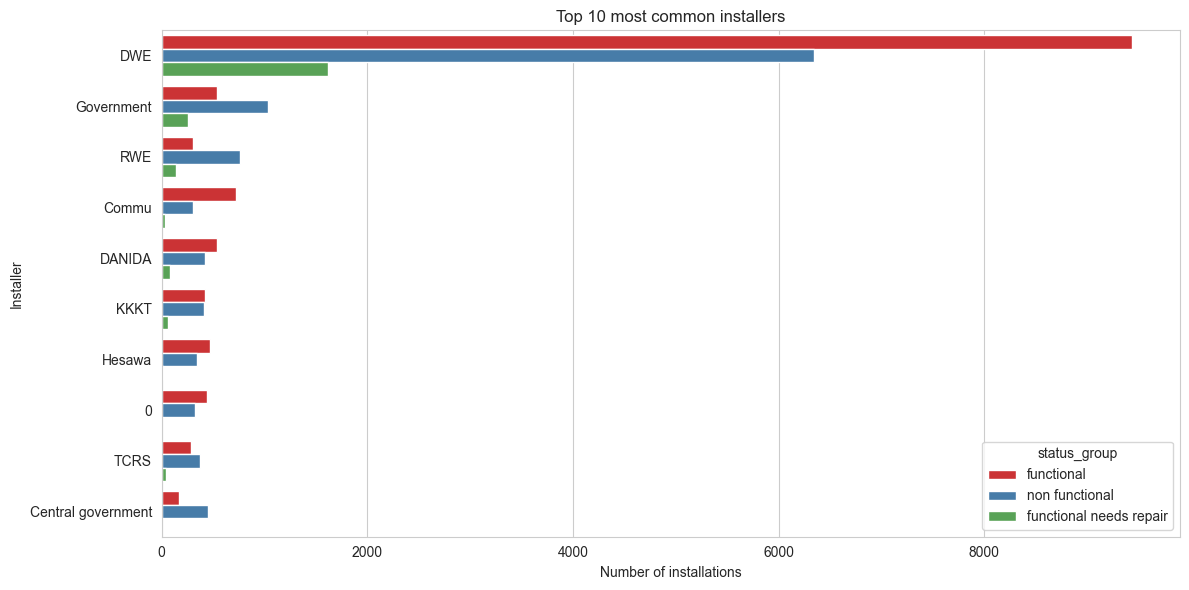

In [28]:
plt.figure(figsize=(12, 6))

sns.countplot(y="installer", data=train, palette="Set1", order=train["installer"].value_counts().head(10).index, hue="status_group")
plt.title("Top 10 most common installers")
plt.xlabel("Number of installations")
plt.ylabel("Installer")
plt.tight_layout()
plt.show()

From this, we can see that DWE is the most common installer by a long way. Majority of DME installed pumps are functional too, whereas installers like the Government and RWE have majority non-functional. The installer variable is likely to be important for the model, but the high cardinality might mean dimensionality reduction will need to occur. 

This also shows that unknown values are imputed with 0.

##### Funder

In [29]:
train["funder"].describe()

count                      55763
unique                      1896
top       Government Of Tanzania
freq                        9084
Name: funder, dtype: object

In [31]:
train["funder"].value_counts().head(10)

funder
Government Of Tanzania    9084
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1349
Kkkt                      1287
World Vision              1246
Unicef                    1057
Tasaf                      877
District Council           843
Name: count, dtype: int64

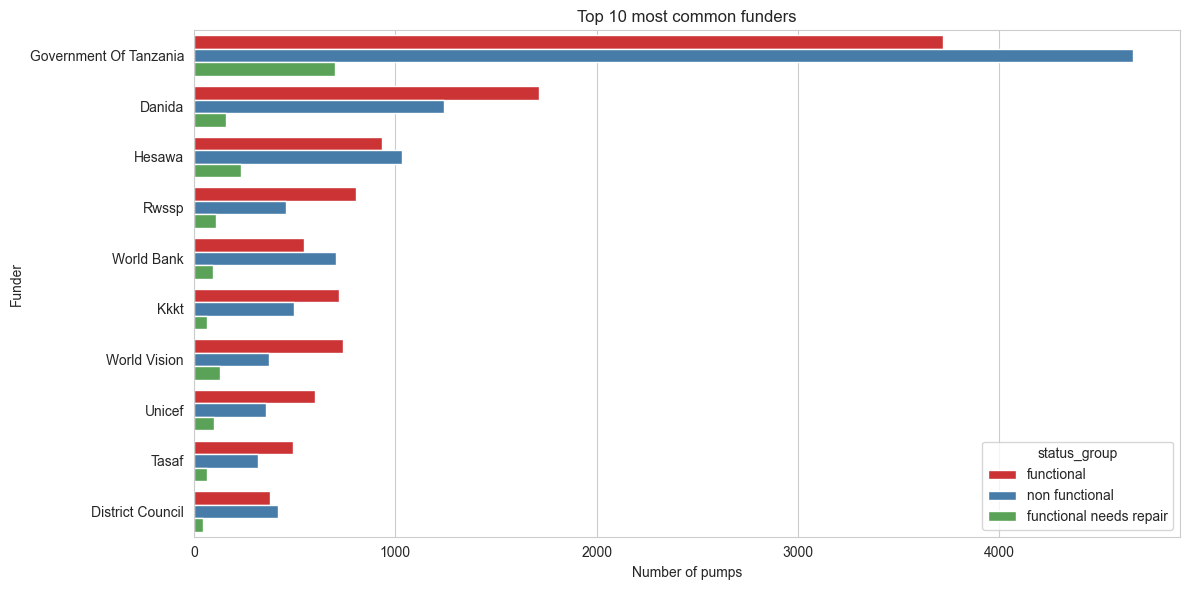

In [32]:
plt.figure(figsize=(12, 6))

sns.countplot(y="funder", data=train, palette="Set1", order=train["funder"].value_counts().head(10).index, hue="status_group")
plt.title("Top 10 most common funders")
plt.xlabel("Number of pumps")
plt.ylabel("Funder")
plt.tight_layout()
plt.show()

We can see that the majority of pumps are funded by the Government, but majority of these are non-functional. The data for the top 10 most common funders seems to be more evenly distributed than for the installers. I also think that this variable will be useful for the model as it appears some funders have more non-functional pumps than others. 

### Longitude and Lattitude

In [33]:
train["longitude"].describe()

count   59400.000
mean       34.077
std         6.567
min         0.000
25%        33.090
50%        34.909
75%        37.178
max        40.345
Name: longitude, dtype: float64

In [34]:
train["latitude"].describe()

count   59400.000
mean       -5.706
std         2.946
min       -11.649
25%        -8.541
50%        -5.022
75%        -3.326
max        -0.000
Name: latitude, dtype: float64

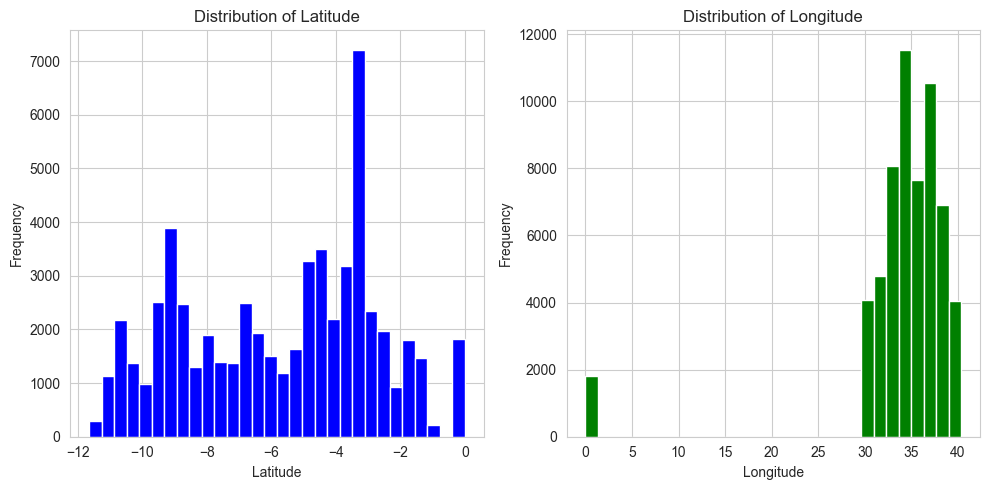

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].hist(train['latitude'], bins=30, color='blue')
axes[0].set_xlabel('Latitude')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Latitude')

axes[1].hist(train['longitude'], bins=30, color='green')
axes[1].set_xlabel('Longitude')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Longitude')

plt.tight_layout()
plt.show()

This confirms that values of 0 should not be present in either latitude nor longitude. All non-zero lattitude and longitude values seem to be correct. 

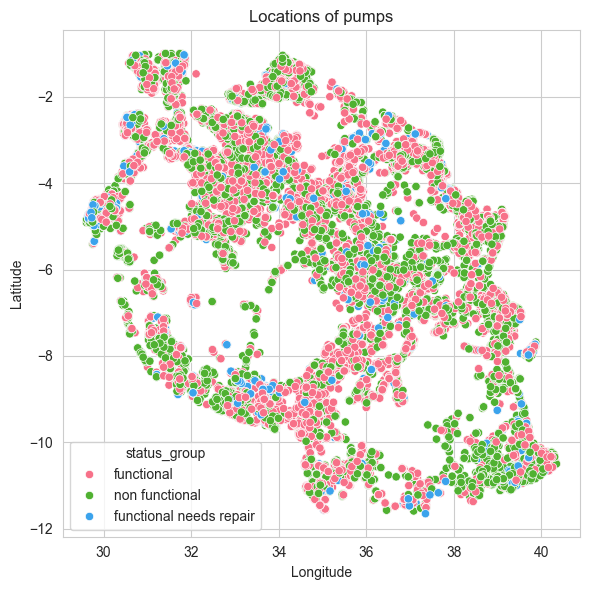

In [36]:
temp = train[(train["longitude"] != 0) & (train["latitude"] != 0)]
plt.figure(figsize=(6, 6))
sns.scatterplot(x=temp["longitude"], y=temp["latitude"], hue=temp["status_group"], palette="husl")
plt.title("Locations of pumps")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.tight_layout()
plt.show()

We can see that there are large areas in Tanzania that have little to no waterpumps. There is no obvious relationship between location and waterpump status. In this case, it is reasonable to drop longitude and latitude.

### gps_height

In [37]:
train["gps_height"].describe()

count   59400.000
mean      668.297
std       693.116
min       -90.000
25%         0.000
50%       369.000
75%      1319.250
max      2770.000
Name: gps_height, dtype: float64

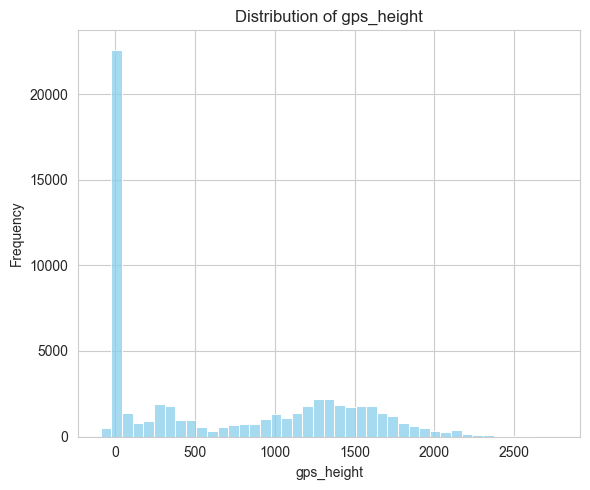

In [38]:
# Plot distribution of gps_height
plt.figure(figsize=(6, 5))

sns.histplot(train["gps_height"], color="skyblue")
plt.title("Distribution of gps_height")
plt.xlabel("gps_height")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

There are a high number of values of 0 for gps_height. There is also a negative number, which cannot be correct as there is no part of Tanzania that is below sea level. Also, the lowest part of Tanzania is 0m (sea level), so while it may be possible for there to be a gps_height value of 0, it should not be as common as it is in this data. We can confirm this by plotting gps_height by latitude, to visualise where the gps_height is 0.

/var/folders/c2/gcn21r4d0131yjb2dvjgy9w40000gn/T/ipykernel_10856/2660636830.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["gps_height_zero"] = temp["gps_height"] == 0


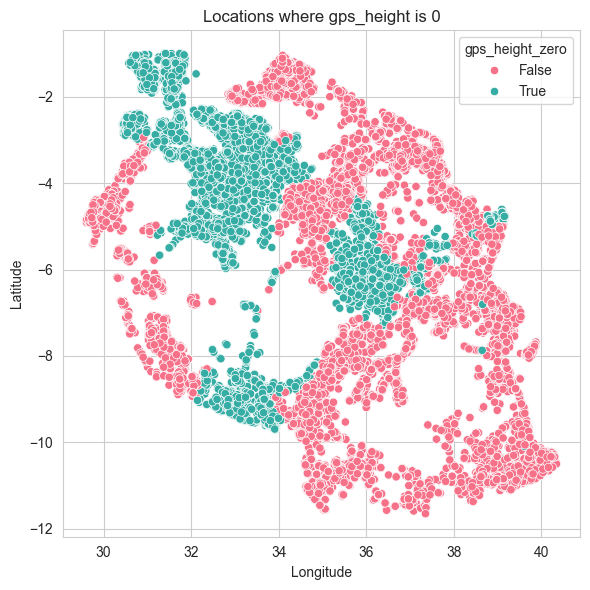

In [39]:
# New boolean column for gps_height being 0
temp["gps_height_zero"] = temp["gps_height"] == 0

# Plot locations where gps_height is 0
plt.figure(figsize=(6, 6))

sns.scatterplot(x=temp["longitude"], y=temp["latitude"], hue=temp["gps_height_zero"], palette="husl")
plt.title("Locations where gps_height is 0")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.tight_layout()
plt.show()

We can now see all the locations that have a gps_height value of 0. For reference, the lowest point in Tanzania is on the East coast in the Indian ocean. All the values with a gps height of 0 are incorrect, and it can now be assumed that they are unknown values. 

/var/folders/c2/gcn21r4d0131yjb2dvjgy9w40000gn/T/ipykernel_10856/2083674119.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['gps_height'], label=label, shade=True)
/var/folders/c2/gcn21r4d0131yjb2dvjgy9w40000gn/T/ipykernel_10856/2083674119.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['gps_height'], label=label, shade=True)
/var/folders/c2/gcn21r4d0131yjb2dvjgy9w40000gn/T/ipykernel_10856/2083674119.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['gps_height'], label=label, shade=True)


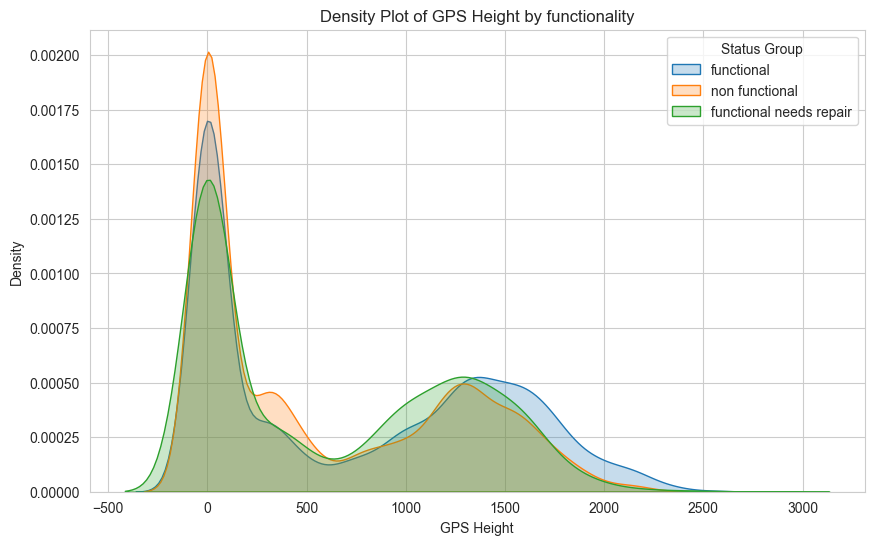

In [40]:
#shows us the plot of gps_height against the target variable
plt.figure(figsize=(10, 6))
# Creates a density plot for each status group
for label in train['status_group'].unique():
    subset = train[train['status_group'] == label]
    sns.kdeplot(subset['gps_height'], label=label, shade=True)
plt.title('Density Plot of GPS Height by functionality')
plt.xlabel('GPS Height')
plt.ylabel('Density')
plt.legend(title='Status Group')
plt.show()

From this plot, we can notice that all three statuses have the same trend, implying that gps_height has nothing to do with the overall status. Therefore, we are happy to remove this.

### wpt_name
This refers to the name of the waterpump.

In [41]:
train["wpt_name"].describe()

count     59398
unique    37399
top        none
freq       3563
Name: wpt_name, dtype: object

In [42]:
train["wpt_name"].value_counts().head(10)

wpt_name
none               3563
Shuleni            1748
Zahanati            830
Msikitini           535
Kanisani            323
Bombani             271
Sokoni              260
Ofisini             254
School              208
Shule Ya Msingi     199
Name: count, dtype: int64

This is another variable with high cardinality. Majority of waterpumps do not have a name. This does not appear to affect the status of the waterpump in anyway, so we can discard this variable.

### num_private
There is no given description for this variable.

In [43]:
train["num_private"].describe()

count     59400
unique       65
top           0
freq      58643
Name: num_private, dtype: int64

We can see that the most common value for this variable is 0, and nearly all values are 0. Therefore, this variable appears to be useless and should be discarded.

### Basin
This variable refers to the geographical water basins in Tanzania.

In [44]:
train["basin"].describe()

count             59400
unique                9
top       Lake Victoria
freq              10248
Name: basin, dtype: object

There are only 9 unique values, so let's get a better look at the distribution.

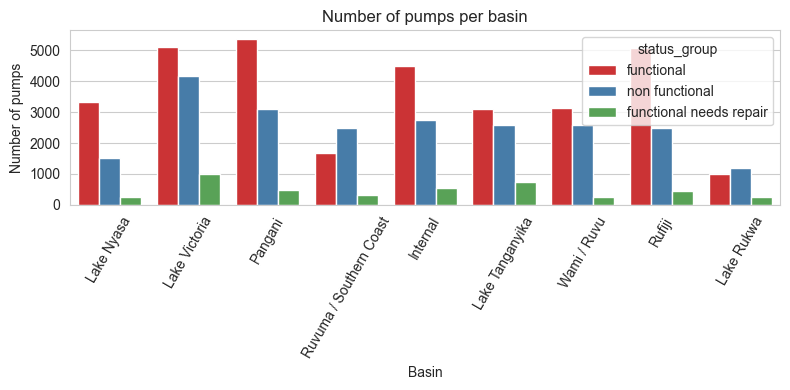

In [45]:
# Plot number of pumps per basin
plt.figure(figsize=(8, 4))

sns.countplot(x="basin", data=train, palette="Set1", hue="status_group")
plt.title("Number of pumps per basin")
plt.xlabel("Basin")
plt.ylabel("Number of pumps")
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()


Nothing really stands out here, the distribution is pretty much evenly spread. Some basins have more functional pumps than others, for example Pangani and Rufiji basins have a lot more functional pumps compared to non-functional, whereas Ruvuma/Southern Coast and Lake Rukwa have more non-functional pumps than functional.

Let's visualise where the basins are located in Tanzania using the longitude and latitude data.

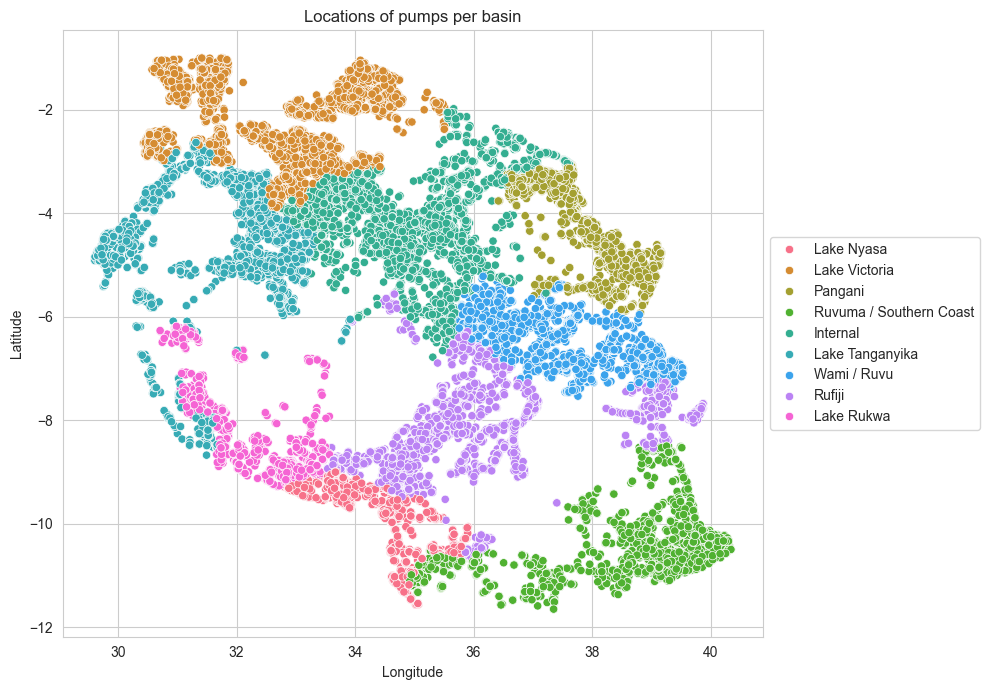

In [46]:
plt.figure(figsize=(10, 7))

sns.scatterplot(x=temp["longitude"], y=temp["latitude"], hue=temp["basin"], palette="husl")
plt.title("Locations of pumps per basin")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Move legend to right outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

### Region and region code

In [47]:
train["region"].describe()

count      59400
unique        21
top       Iringa
freq        5294
Name: region, dtype: object

In [48]:
train["region_code"].describe()

count     59400
unique       27
top          11
freq       5300
Name: region_code, dtype: int64

We can see that *region* has 21 unique values, but *region_code* has 27 unique values. This suggests that *region_code* has more valuable information than *region* and might be worth prioritising.

In [49]:
region_code = train.groupby(["region", "region_code"])["id"].count().reset_index()
region_code

,region,region_code,id
0,Arusha,2,3024
1,Arusha,24,326
2,Dar es Salaam,7,805
3,Dodoma,1,2201
4,Iringa,11,5294
5,Kagera,18,3316
6,Kigoma,16,2816
7,Kilimanjaro,3,4379
8,Lindi,8,300
9,Lindi,18,8


This confirms that some regions in Tanzania have more than one region code. 

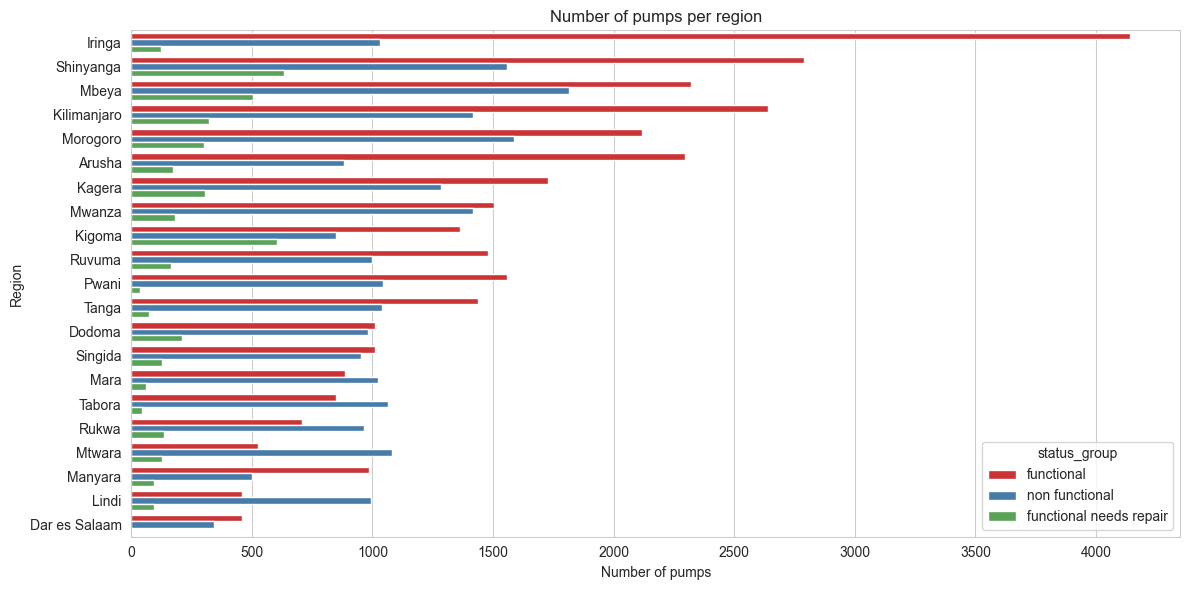

In [50]:
# Plot number of pumps per region
plt.figure(figsize=(12, 6))

sns.countplot(y="region", data=train, palette="Set1", order=train["region"].value_counts().index, hue="status_group")
plt.title("Number of pumps per region")
plt.xlabel("Number of pumps")
plt.ylabel("Region")
plt.tight_layout()
plt.show()

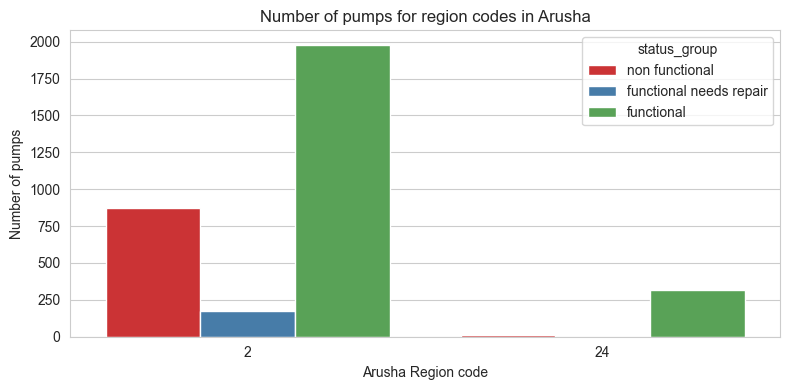

In [51]:
# Plot number of pumps for region code 2 and 24
plt.figure(figsize=(8, 4))

sns.countplot(x="region_code", data=train[train["region_code"].isin([2, 24])], palette="Set1", hue="status_group")
plt.title("Number of pumps for region codes in Arusha")
plt.xlabel("Arusha Region code")
plt.ylabel("Number of pumps")
plt.tight_layout()
plt.show()

We can see from the two plots above that the number of pumps varies greatly between region codes within the same region. This variation can only be seen when looking at *region_codes*.

### District code
Let's see how district code differs from region and region code.

In [52]:
train["district_code"].describe()

count     59400
unique       20
top           1
freq      12203
Name: district_code, dtype: int64

In [53]:
district_code = train.groupby(["region", "district_code"])["id"].count().reset_index()
district_code

,region,district_code,id
0,Arusha,1,189
1,Arusha,2,1206
2,Arusha,3,109
3,Arusha,5,201
4,Arusha,6,310
...,...,...,...
127,Tanga,4,110
128,Tanga,5,293
129,Tanga,6,266
130,Tanga,7,127


We can now see that district code refers to the individual districts in each region. This are independent from other regions, so Arusha can have district 1,2,3 and so can Tanga.

### LGA
LGA stands for Local Government Authority

In [54]:
train["lga"].describe()

count      59400
unique       125
top       Njombe
freq        2503
Name: lga, dtype: object

In [55]:
lga = train.groupby(["region", "lga"])["id"].count().reset_index()
lga

,region,lga,id
0,Arusha,Arusha Rural,1252
1,Arusha,Arusha Urban,63
2,Arusha,Karatu,326
3,Arusha,Longido,310
4,Arusha,Meru,1009
...,...,...,...
120,Tanga,Lushoto,694
121,Tanga,Mkinga,288
122,Tanga,Muheza,334
123,Tanga,Pangani,305


There are 125 LGAs in total. Each region has multiple LGAs. Let's look at Arusha again to see the distribution of water pumps in each LGA.

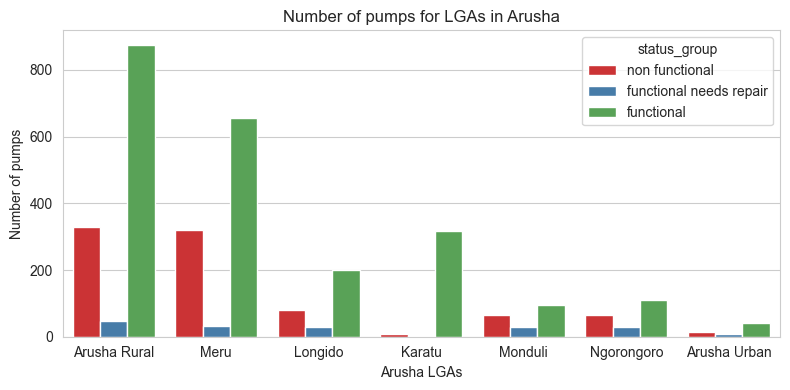

In [56]:
# Plot number of pumps for each LGA in Arusha
plt.figure(figsize=(8, 4))

sns.countplot(x="lga", data=train[train["lga"].isin(["Arusha Rural", "Arusha Urban", "Karatu", "Longido", "Meru", "Monduli", "Ngorongoro"])], palette="Set1", hue="status_group")
plt.title("Number of pumps for LGAs in Arusha")
plt.xlabel("Arusha LGAs")
plt.ylabel("Number of pumps")
plt.tight_layout()
plt.show()

Like *district_code*, this feature could be useful for the model, although it has higher cardinality.

### Ward and subvillage
These are also geographical features. A ward refers to a single town or city and there are many wards per LGA. A ward can be broken down into subvillages.

In [57]:
train["ward"].describe()

count     59400
unique     2092
top       Igosi
freq        307
Name: ward, dtype: object

In [58]:
train["subvillage"].describe()

count        59029
unique       19287
top       Madukani
freq           508
Name: subvillage, dtype: object

In [59]:
train.groupby(["lga", "ward", "subvillage"])["id"].count().reset_index()

,lga,ward,subvillage,id
0,Arusha Rural,Bangata,Engikaleti,19
1,Arusha Rural,Bangata,Gwasei,1
2,Arusha Rural,Bangata,Kwaniche,5
3,Arusha Rural,Bangata,Lobolosi,1
4,Arusha Rural,Bangata,Ndukenyi,2
...,...,...,...,...
27476,Uyui,Usagali,Migungumalo,1
27477,Uyui,Usagali,Msagari,1
27478,Uyui,Usagali,Msimba,2
27479,Uyui,Usagali,Msungu,1


Both *ward* and *subvillage* have very high cardinality and will not be suitable for the model.

### Population
Refers to the population around the well.

In [60]:
train["population"].describe()

count   59400.000
mean      179.910
std       471.482
min         0.000
25%         0.000
50%        25.000
75%       215.000
max     30500.000
Name: population, dtype: float64

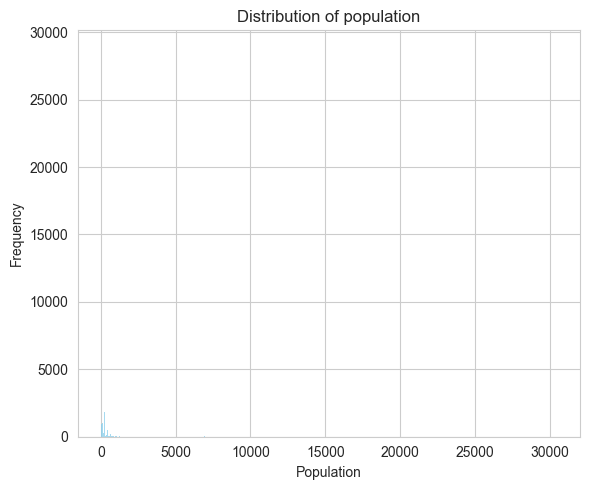

In [61]:
# Plot the distribution of population
plt.figure(figsize=(6, 5))

sns.histplot(train["population"], color="skyblue")
plt.title("Distribution of population")
plt.xlabel("Population")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

It appears that there are a lot of 0 values, suggesting they have been imputed for missing values. There is also a max value of 30,500, which seems to be an outlier as the 75% percentile is 215. 

### Public meeting

In [62]:
train["public_meeting"].describe()

count     56066
unique        2
top        True
freq      51011
Name: public_meeting, dtype: object

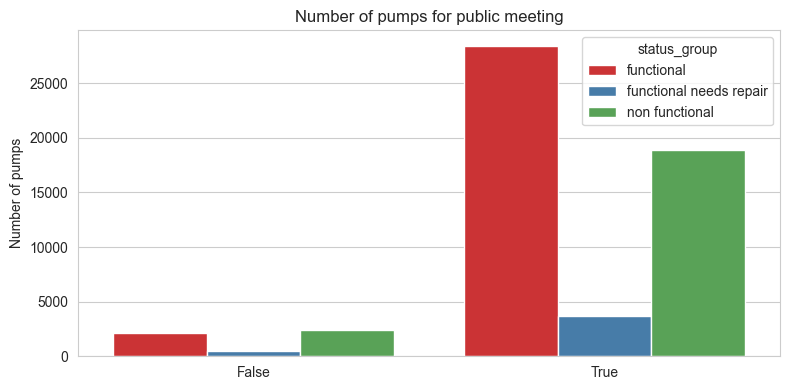

In [63]:
# Plot number of pumps for public meeting
plt.figure(figsize=(8, 4))

sns.countplot(x="public_meeting", data=train, palette="Set1", hue="status_group")
plt.title("Number of pumps for public meeting")
plt.xlabel("")
plt.ylabel("Number of pumps")
plt.tight_layout()
plt.show()

Most pumps have a public meeting. It seems that pumps with a public meeting have a higher chance to be functional.

### Management group, scheme management, and management features

In [64]:
train["management_group"].describe()

count          59400
unique             5
top       user-group
freq           52490
Name: management_group, dtype: object

In [65]:
train["scheme_management"].describe()

count     55522
unique       11
top         VWC
freq      36793
Name: scheme_management, dtype: object

In [66]:
train["management"].describe()

count     59400
unique       12
top         vwc
freq      40507
Name: management, dtype: object

It appears that *management_group* has the least categories, and *scheme_management* likely breaks down some categories into subcategories. *management* has one more category than *scheme_management*, so it is not obvious what the relationship between them is.

In [67]:
# List the different values of management_group
train["management_group"].value_counts()

management_group
user-group    52490
commercial     3638
parastatal     1768
other           943
unknown         561
Name: count, dtype: int64

In [68]:
# List different values of scheme_management
train["scheme_management"].value_counts()

scheme_management
VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
Name: count, dtype: int64

In [69]:
# List different values of management
train["management"].value_counts()

management
vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: count, dtype: int64

In [70]:
train.groupby(["management_group", "scheme_management", "management"])["id"].count().reset_index()

,management_group,scheme_management,management,id
0,commercial,Company,company,674
1,commercial,Company,private operator,224
2,commercial,Other,private operator,64
3,commercial,Other,trust,1
4,commercial,Other,water authority,19
...,...,...,...,...
79,user-group,Water Board,wug,111
80,user-group,Water authority,vwc,1297
81,user-group,Water authority,water board,730
82,user-group,Water authority,wua,12


It seems that *scheme_management* and *management* are similar. We will choose *scheme_management* for the model as it seems like a good mix between *managment_group* and *management*. 

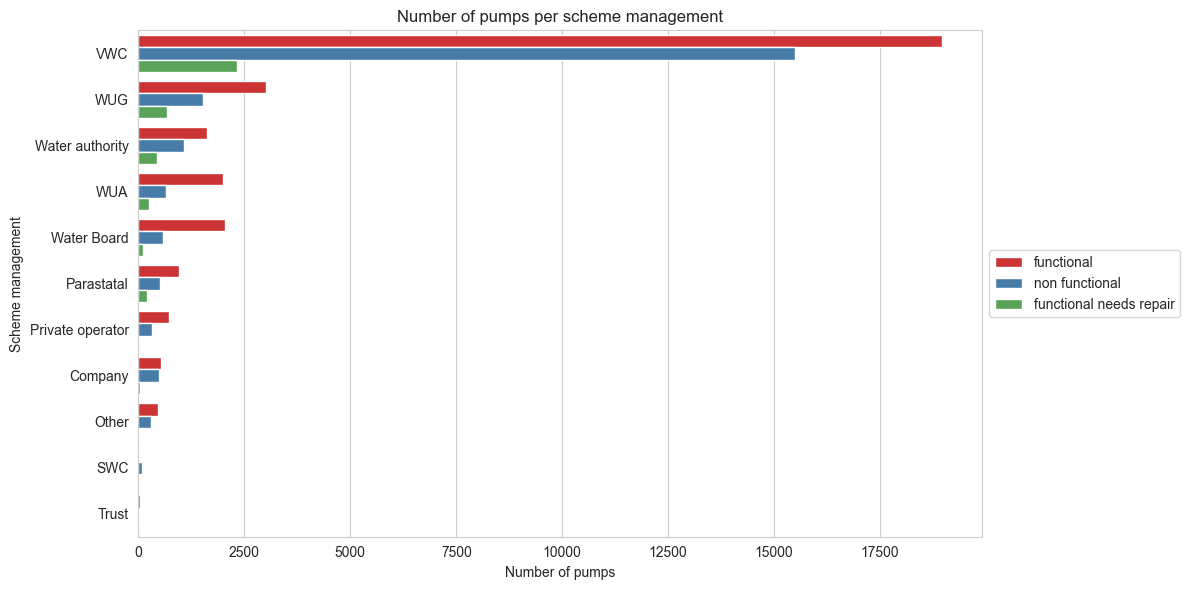

In [71]:
# Plot distribution of pumps per scheme_management
plt.figure(figsize=(12, 6))

sns.countplot(y="scheme_management", data=train, palette="Set1", order=train["scheme_management"].value_counts().index, hue="status_group")
plt.title("Number of pumps per scheme management")
plt.xlabel("Number of pumps")
plt.ylabel("Scheme management")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

### Permit

In [72]:
train["permit"].describe()

count     56344
unique        2
top        True
freq      38852
Name: permit, dtype: object

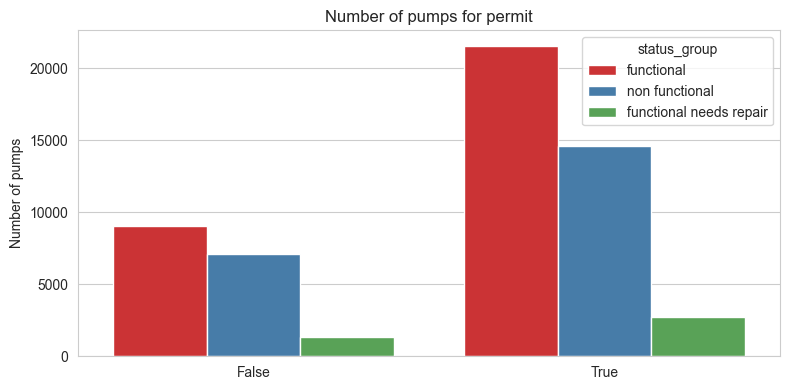

In [73]:
# Plot permit
plt.figure(figsize=(8, 4))

sns.countplot(x="permit", data=train, palette="Set1", hue="status_group")
plt.title("Number of pumps for permit")
plt.xlabel("")
plt.ylabel("Number of pumps")
plt.tight_layout()
plt.show()

The distribution for each category in this feature look fairly similar. I am not sure if this feature is needed.

### Construction year

In [74]:
train["construction_year"].describe()

count   59400.000
mean     1300.652
std       951.621
min         0.000
25%         0.000
50%      1986.000
75%      2004.000
max      2013.000
Name: construction_year, dtype: float64

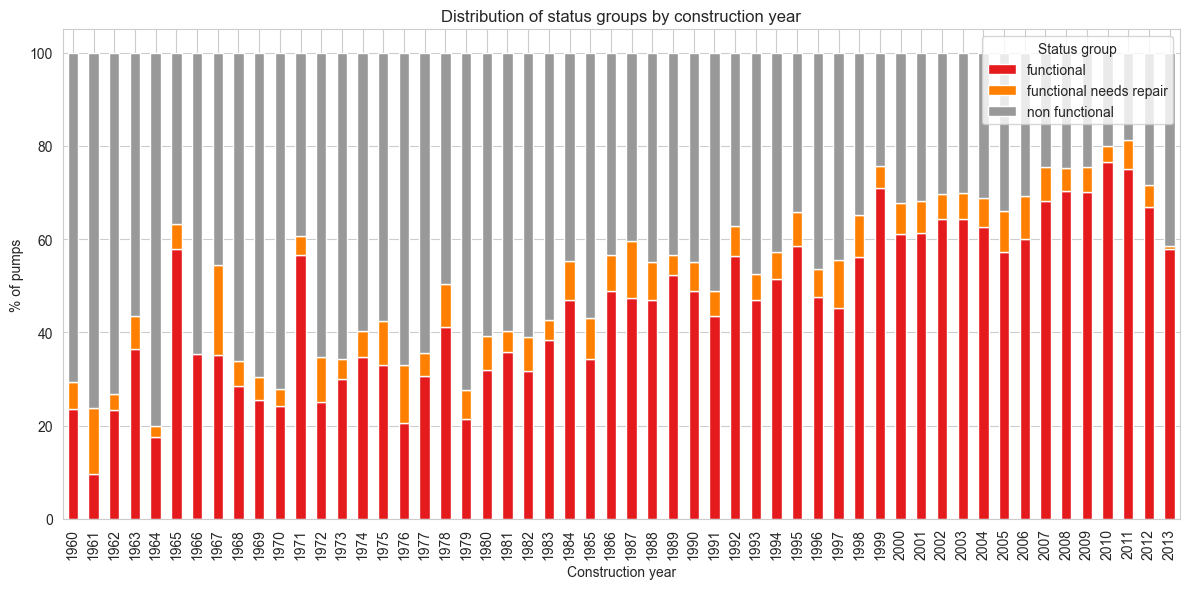

In [75]:
grouped = train[train["construction_year"] != 0].groupby("construction_year")["status_group"].value_counts(normalize=True).unstack().fillna(0) * 100

grouped.plot(kind="bar", stacked=True, figsize=(12,6), colormap="Set1")
plt.title("Distribution of status groups by construction year")
plt.xlabel("Construction year")
plt.ylabel("% of pumps")
plt.legend(title="Status group")
plt.tight_layout()
plt.show()

This shows that the older the pump is, the more likely it is to be non-functional. This can be a useful feature, but we will need to impute a lot of missing values.

### Scheme name

In [76]:
train["scheme_name"].describe()

count     30590
unique     2695
top           K
freq        682
Name: scheme_name, dtype: object

In [77]:
train["scheme_name"].value_counts().head(10)

scheme_name
K                              682
Borehole                       546
Chalinze wate                  405
M                              400
DANIDA                         379
Government                     320
Ngana water supplied scheme    270
wanging'ombe water supply s    261
wanging'ombe supply scheme     234
Bagamoyo wate                  229
Name: count, dtype: int64

This feature has very high cardinality and is unlikely to be useful, especially since we have features like *scheme_management*.

### Extraction type, extraction type group, and extraction type class
These three features seem to be largely similar, and are probably hierarchical like the management features.

In [78]:
train["extraction_type"].describe()

count       59400
unique         18
top       gravity
freq        26780
Name: extraction_type, dtype: object

In [79]:
train["extraction_type_group"].describe()

count       59400
unique         13
top       gravity
freq        26780
Name: extraction_type_group, dtype: object

In [80]:
train["extraction_type_class"].describe()

count       59400
unique          7
top       gravity
freq        26780
Name: extraction_type_class, dtype: object

*extraction_type_class* has the least unique values, so this seems to be the highest one in the hierarchy as it is the least granular.

*extraction_type_group* has the second most unique values, and *extraction_type* has the most.

In [81]:
# List the different values of extraction_type_class
train["extraction_type_class"].value_counts()

extraction_type_class
gravity         26780
handpump        16456
other            6430
submersible      6179
motorpump        2987
rope pump         451
wind-powered      117
Name: count, dtype: int64

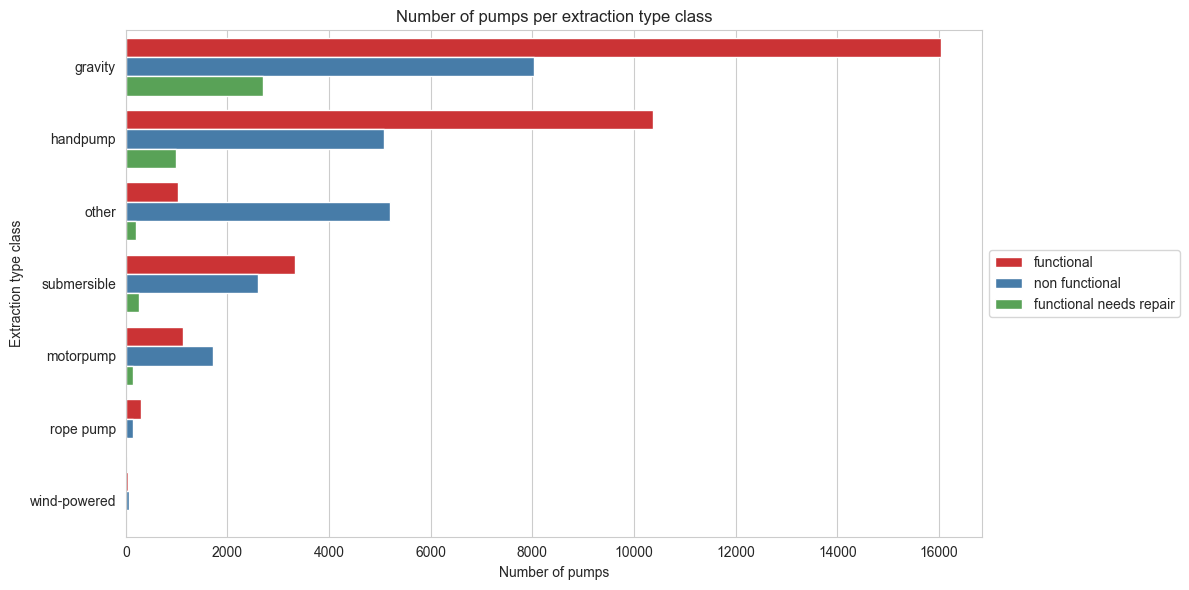

In [82]:
# Plot distribution of pumps per extraction_type_class
plt.figure(figsize=(12, 6))

sns.countplot(y="extraction_type_class", data=train, palette="Set1", order=train["extraction_type_class"].value_counts().index, hue="status_group")
plt.title("Number of pumps per extraction type class")
plt.xlabel("Number of pumps")
plt.ylabel("Extraction type class")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

We can see there seems to be some variation between the extraction type class categories. Gravity is the most common. Rope pump and wind-powered are the least common. Motorpump and other have a lot of non-functional pumps compared to functional pumps, which should be investigated more. Gravity and handpump seem to have a lot of funcitonal pumps compared to non-functional pumps.

In [83]:
# List the different values of extraction_type_group
train["extraction_type_group"].value_counts()

extraction_type_group
gravity            26780
nira/tanira         8154
other               6430
submersible         6179
swn 80              3670
mono                2865
india mark ii       2400
afridev             1770
rope pump            451
other handpump       364
other motorpump      122
wind-powered         117
india mark iii        98
Name: count, dtype: int64

In [84]:
# List the different values of extraction_type
train["extraction_type"].value_counts()

extraction_type
gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: count, dtype: int64

In [85]:
train.groupby(["extraction_type_class", "extraction_type_group", "extraction_type"])["id"].count().reset_index()

,extraction_type_class,extraction_type_group,extraction_type,id
0,gravity,gravity,gravity,26780
1,handpump,afridev,afridev,1770
2,handpump,india mark ii,india mark ii,2400
3,handpump,india mark iii,india mark iii,98
4,handpump,nira/tanira,nira/tanira,8154
5,handpump,other handpump,other - mkulima/shinyanga,2
6,handpump,other handpump,other - play pump,85
7,handpump,other handpump,other - swn 81,229
8,handpump,other handpump,walimi,48
9,handpump,swn 80,swn 80,3670


Similarly, to the management features, it might be the best option to choose the middle feature (extraction_type_group) since it has more detail than *extraction_type_class*, but combines categories form *extraction_type* that have very few values.

### Payment and payment type

In [86]:
train["payment"].describe()

count         59400
unique            7
top       never pay
freq          25348
Name: payment, dtype: object

In [87]:
train["payment_type"].describe()

count         59400
unique            7
top       never pay
freq          25348
Name: payment_type, dtype: object

In [88]:
# List the different values of payment
train["payment"].value_counts()

payment
never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: count, dtype: int64

In [89]:
# List the different values of payment_type
train["payment_type"].value_counts()

payment_type
never pay     25348
per bucket     8985
monthly        8300
unknown        8157
on failure     3914
annually       3642
other          1054
Name: count, dtype: int64

It seems there is no difference between these two features except for slight difference in the name of the categories for each one. Therefore, one can be discarded.

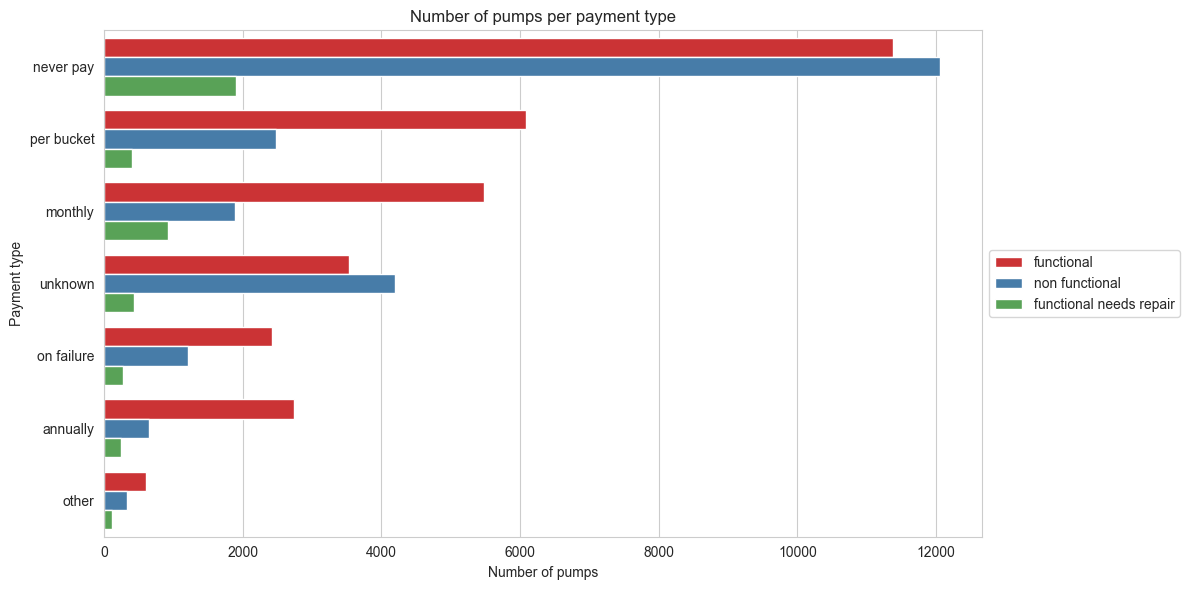

In [90]:
# Plot distribution of pumps per payment type
plt.figure(figsize=(12, 6))

sns.countplot(y="payment_type", data=train, palette="Set1", order=train["payment_type"].value_counts().index, hue="status_group")
plt.title("Number of pumps per payment type")
plt.xlabel("Number of pumps")
plt.ylabel("Payment type")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

Majority of pumps require no payment whatsoever. These free pumps also have more non-functional pumps than functional. Pumps that require some form of payment have more functional than non-functional pumps.

### Water quality and quality_group
These two features have the same description.

In [91]:
train["water_quality"].describe()

count     59400
unique        8
top        soft
freq      50818
Name: water_quality, dtype: object

In [92]:
train["quality_group"].describe()

count     59400
unique        6
top        good
freq      50818
Name: quality_group, dtype: object

In [93]:
train.groupby(["water_quality", "quality_group"])["id"].count().reset_index()

,water_quality,quality_group,id
0,coloured,colored,490
1,fluoride,fluoride,200
2,fluoride abandoned,fluoride,17
3,milky,milky,804
4,salty,salty,4856
5,salty abandoned,salty,339
6,soft,good,50818
7,unknown,unknown,1876


These two features are largely the same, except *water_quality* splits up the fluoride category into fluoride and fluoride abandoned. The fluoride abandoned category only has 17 values, so it is probably not worth keeping.

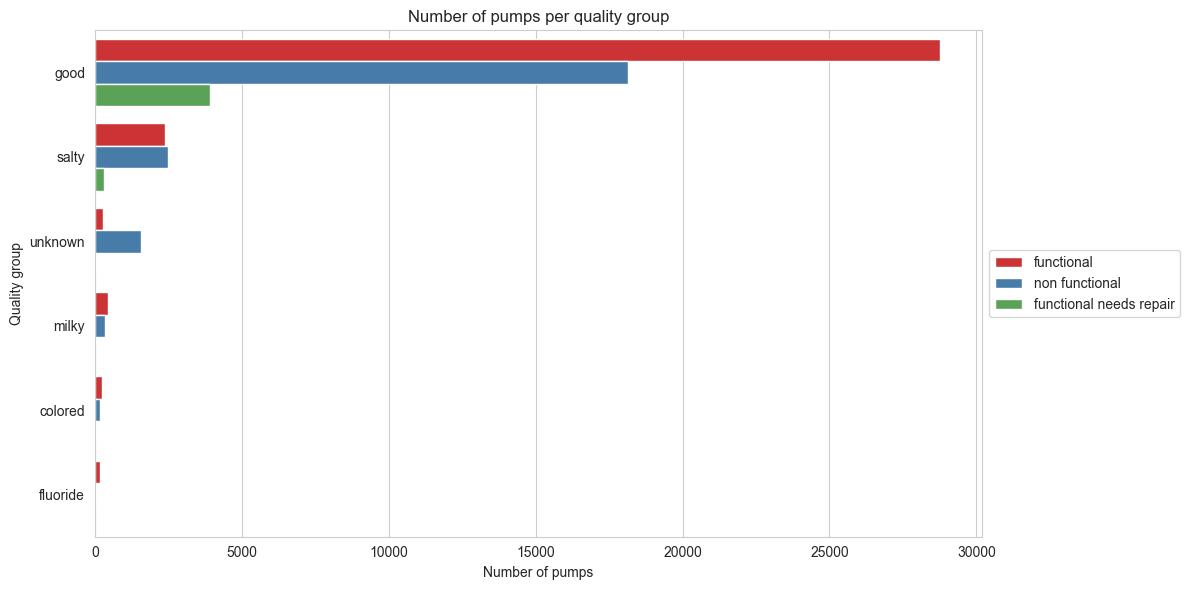

In [94]:
# Plot distribution of pumps per quality_group
plt.figure(figsize=(12, 6))

sns.countplot(y="quality_group", data=train, palette="Set1", order=train["quality_group"].value_counts().index, hue="status_group")
plt.title("Number of pumps per quality group")
plt.xlabel("Number of pumps")
plt.ylabel("Quality group")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

We can see that pumps with good quality water have the highest percentage of functional pumps. Pumps with worse quality seem to have a much lower percentage of functioning pumps. Salty water has more non-functioning pumps than functional.

### Quantity and quantity group
Both features refer to the quantity of water.

In [95]:
train["quantity"].describe()

count      59400
unique         5
top       enough
freq       33186
Name: quantity, dtype: object

In [96]:
train["quantity_group"].describe()

count      59400
unique         5
top       enough
freq       33186
Name: quantity_group, dtype: object

In [97]:
train.groupby(["quantity", "quantity_group"])["id"].count().reset_index()

,quantity,quantity_group,id
0,dry,dry,6246
1,enough,enough,33186
2,insufficient,insufficient,15129
3,seasonal,seasonal,4050
4,unknown,unknown,789


We can see that there is no difference between these two features, so one can be discarded.

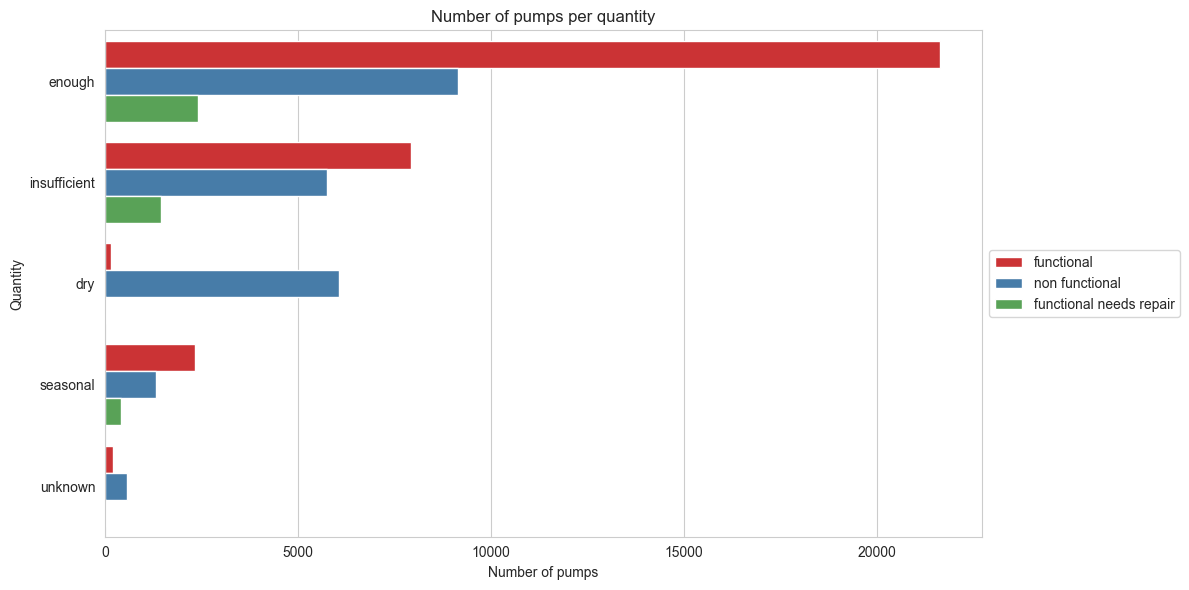

In [98]:
# Plot distribution of pumps per quantity
plt.figure(figsize=(12, 6))

sns.countplot(y="quantity", data=train, palette="Set1", order=train["quantity"].value_counts().index, hue="status_group")
plt.title("Number of pumps per quantity")
plt.xlabel("Number of pumps")
plt.ylabel("Quantity")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

There doesn't seem to be much variation in functionality distribution between enough and insufficient quantities. However, dry waterpumps have a very high percentage of non-functional pumps.

### Source, source type, and source class
All refer to the source of the water.

In [99]:
train["source"].describe()

count      59400
unique        10
top       spring
freq       17021
Name: source, dtype: object

In [100]:
train["source_type"].describe()

count      59400
unique         7
top       spring
freq       17021
Name: source_type, dtype: object

In [101]:
train["source_class"].describe()

count           59400
unique              3
top       groundwater
freq            45794
Name: source_class, dtype: object

It appears that we have a similar situation to previous similar features. Here, *source_class* is the least granular and *source* is the most granular. 

In [102]:
train.groupby(["source_class", "source_type", "source"])["id"].count().reset_index()

,source_class,source_type,source,id
0,groundwater,borehole,hand dtw,874
1,groundwater,borehole,machine dbh,11075
2,groundwater,shallow well,shallow well,16824
3,groundwater,spring,spring,17021
4,surface,dam,dam,656
5,surface,rainwater harvesting,rainwater harvesting,2295
6,surface,river/lake,lake,765
7,surface,river/lake,river,9612
8,unknown,other,other,212
9,unknown,other,unknown,66


Similar to before, it might be best to keep *source_type*, as it has more details than *source_class*, but combines categories with low values.

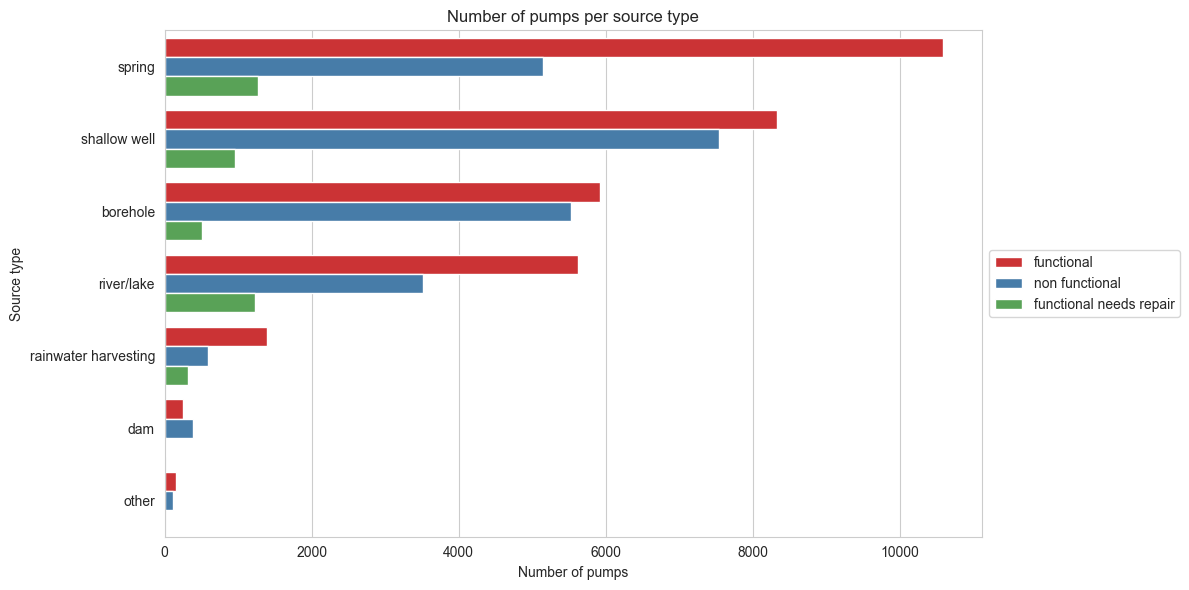

In [103]:
# Plot distribution of pumps per source_type
plt.figure(figsize=(12, 6))

sns.countplot(y="source_type", data=train, palette="Set1", order=train["source_type"].value_counts().index, hue="status_group")
plt.title("Number of pumps per source type")
plt.xlabel("Number of pumps")
plt.ylabel("Source type")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

The distribution for each source type seems to be fairly similar, except for dams, where there are more non-functional pumps than functional.

### Waterpoint type and waterpoint type group
Both refer to the kind of waterpoint.

In [104]:
train["waterpoint_type"].describe()

count                  59400
unique                     7
top       communal standpipe
freq                   28522
Name: waterpoint_type, dtype: object

In [105]:
train["waterpoint_type_group"].describe()

count                  59400
unique                     6
top       communal standpipe
freq                   34625
Name: waterpoint_type_group, dtype: object

In [106]:
train.groupby(["waterpoint_type_group", "waterpoint_type"])["id"].count().reset_index()

,waterpoint_type_group,waterpoint_type,id
0,cattle trough,cattle trough,116
1,communal standpipe,communal standpipe,28522
2,communal standpipe,communal standpipe multiple,6103
3,dam,dam,7
4,hand pump,hand pump,17488
5,improved spring,improved spring,784
6,other,other,6380


The only difference between the two features is that *waterpoint_type_group* splits the communal standpipe category into communal standpipe and communal standpip multiple.

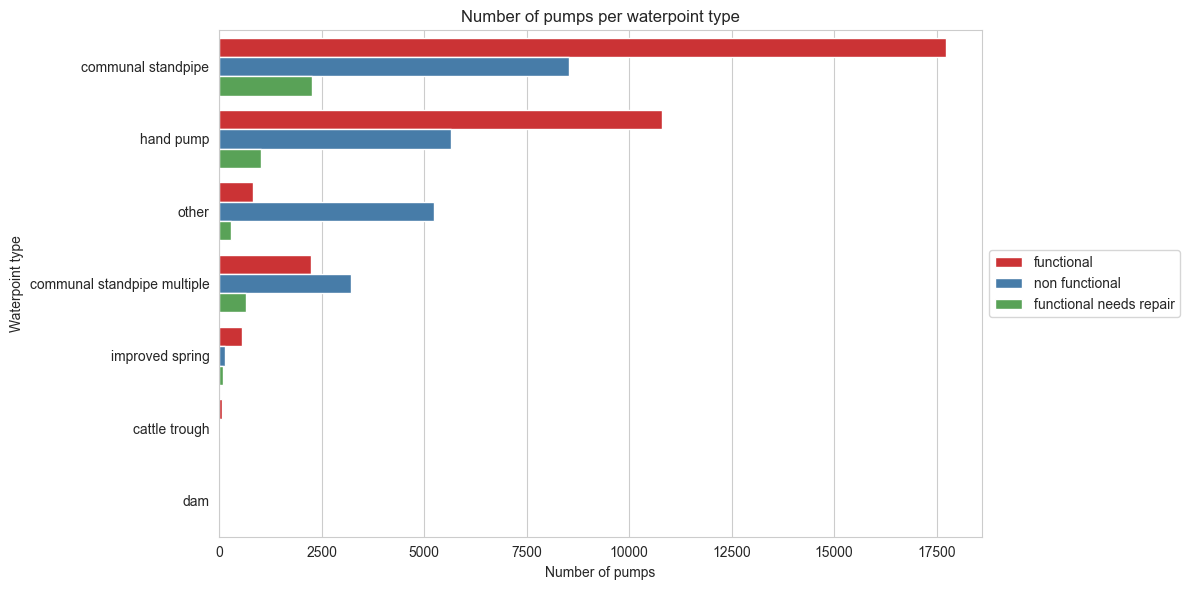

In [107]:
# Plot distribution of pumps for waterpoint type
plt.figure(figsize=(12, 6))

sns.countplot(y="waterpoint_type", data=train, palette="Set1", order=train["waterpoint_type"].value_counts().index, hue="status_group")
plt.title("Number of pumps per waterpoint type")
plt.xlabel("Number of pumps")
plt.ylabel("Waterpoint type")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

This reveals that there is a big difference in waterpump functionality between communal standpipe and communal standpipe multiple. Therefore, it would be best to keep *waterpoint_type*.

### Conclusion:
Features to remove:
- ID
- date_recorded
- scheme_name
- recorded_by
- waterpoint_type_group
- gps_height
- longitude
- latitude
- source
- source_class
- quantity_group
- water_quality
- payment
- extraction_type
- extraction_type_class
- management
- management_group
- ward
- subvillage
- wpt_name
- num_private

# Data Pre-processing

In [108]:
#load the data
df=pd.read_csv("training_set_values.csv")
#so we can see all the columns
pd.set_option("display.max_columns",None)
#all floats set to 3 decimal places
pd.options.display.float_format="{:.3f}".format
#merge the features and the target variables into one dataframe
df = df.merge(pd.read_csv("training_set_labels.csv"))

In [109]:
#from our analysis, we drop these columns straight away, because they either have too many different values to be of any use, are similar to another column, have no context or have no correlation with the target variable
dropping = ["id","latitude","longitude","date_recorded","gps_height","scheme_name","recorded_by","waterpoint_type_group",
            "source","source_class","quantity_group","water_quality","payment","extraction_type","extraction_type_class"
            ,"management","management_group","ward","subvillage","wpt_name","num_private"]
df=df.drop(dropping,axis=1)

In [110]:
#amount_tsh is mostly 0s but have some values above 0, so this code changes it to true for ==0 or false for != 0
df['amount_tsh'] = df['amount_tsh'] == 0

In [111]:
#changes every column to a string type, this is so we can eliminate the missing values easier.
#there are many missing values that have been given the value 0
#however when we search for 0s to change them/delete them, all values that are equal
#to false are flagged as well. Finding missing values this way makes removing/changing the right values
#a lot easier.
for column in df.columns:
    if column != "status_group":
        df[column]=df[column].astype(str)

In [112]:
#this code shows us how many missing values there are in each column
#making it easier for us the preprocess the data
for column in df.columns:
    zero_and_nan_count = (df[column] == "0").sum() + (df[column] == "nan").sum() # Counts zeros and nans
    unknown_count = (df[column] == 'unknown').sum() # Counts 'unknown' as a string
    total_missing = zero_and_nan_count + unknown_count
    if total_missing > 0:
        print(f"{column} has {total_missing} missing values")


funder has 4414 missing values
installer has 4433 missing values
district_code has 23 missing values
population has 21381 missing values
public_meeting has 3334 missing values
scheme_management has 3878 missing values
permit has 3056 missing values
construction_year has 20709 missing values
payment_type has 8157 missing values
quality_group has 1876 missing values
quantity has 789 missing values


In [113]:
#replaces all missing values with nan, so that all rows with a missing value can be called using isna()
df.replace('unknown', np.nan, inplace=True)
df.replace('Unknown', np.nan, inplace=True)
df.replace('0', np.nan, inplace=True)
df.replace('nan', np.nan, inplace=True)
#drops all the rows that have at least 3 missing values, this is done so the machine learning algorithm
#uses accurate data
df=df.dropna(thresh=len(df.columns)-3)

In [114]:
#changes the columns back to their original type
df["population"]=df["population"].astype("float")
df["construction_year"]=df["construction_year"].astype("float")
df["region_code"]=df["region_code"].astype("object")
df["district_code"]=df["district_code"].astype("object")

In [115]:
#gives all nan values the value "Unknown"
df.loc[df["public_meeting"].isna(),"public_meeting"] = "Unknown"
df.loc[df["scheme_management"].isna(),"scheme_management"] = "Unknown"
df.loc[df["permit"].isna(),"permit"] = "Unknown"
df.loc[df["district_code"]==0,"district_code"] = "Unknown"
df.loc[df["funder"].isna(),"funder"] = "Unknown"
df.loc[df["installer"].isna(),"installer"] = "Unknown"
df.loc[df["payment_type"] == "unknown","payment_type"] = "Unknown"
df.loc[df["quality_group"] == "unknown","quality_group"] = "Unknown"
df.loc[df["quantity"] == "unknown","quantity"] = "Unknown"

In [116]:
#checks the value count of each installer
original_max_rows = pd.options.display.max_rows
pd.set_option('display.max_rows', None)
print(df['installer'].value_counts())
pd.set_option('display.max_rows', original_max_rows)

installer
DWE                               16329
Government                         1740
Unknown                            1651
RWE                                1201
Commu                              1060
DANIDA                             1048
KKKT                                896
Hesawa                              823
TCRS                                703
Central government                  616
CES                                 610
DANID                               552
District Council                    547
Community                           545
HESAWA                              520
LGA                                 408
District council                    388
TASAF                               386
Gover                               383
WEDECO                              379
World vision                        359
AMREF                               329
TWESA                               306
WU                                  301
Dmdd                          

In [117]:
#any installer with less than 100 installs is put into the "other" section
counts = df['installer'].value_counts()
rare = counts[counts <= 100].index
df['installer'] = df['installer'].replace(rare, 'other')

In [118]:
#checks the value count of each funder
original_max_rows = pd.options.display.max_rows
pd.set_option('display.max_rows', None)
print(df['funder'].value_counts())
pd.set_option('display.max_rows', original_max_rows)

funder
Government Of Tanzania            8952
Danida                            3111
Hesawa                            2114
Unknown                           1659
Kkkt                              1285
World Bank                        1254
World Vision                      1102
Unicef                            1055
Tasaf                              858
Dhv                                829
Rwssp                              818
District Council                   817
Private Individual                 807
Norad                              763
Germany Republi                    610
Tcrs                               599
Ministry Of Water                  585
Water                              582
Dwsp                               551
Dwe                                483
Netherlands                        459
Hifab                              449
Lga                                441
Adb                                440
Amref                              424
Fini Water        

In [119]:
#any funder with less than 100 funds is put into the other section
counts = df['funder'].value_counts()
rare = counts[counts <= 100].index
df['funder'] = df['funder'].replace(rare, 'other')

In [120]:
#this block of code is to calculate the median of a population in the specific region so
#that we can apply the median population of the region to all of the unknown values
overall_median_population = df[df['population'] > 0]['population'].median()

median_population_per_region = df[df['population'] > 0].groupby('region')['population'].median()

#some regions dont have any data for the population, so are given the median of the whole dataset
def replace_zero_population(row):
    if row['population'] == 0:
        return median_population_per_region.get(row['region'], overall_median_population)
    else:
        return row['population']

df['population'] = df.apply(replace_zero_population, axis=1)

In [121]:
#since population has high cardinality, population is put into bins, which have differing size so the bins are less skewed
bins=[0,100,150,200,300,400,600,800,1000,1500,2000,np.inf]
labels = ["0-100", "101-150", "151-200", "201-300", "301-400", "401-600", "601-800", "801-1000", "1001-1500", "1501-2000", "2001+"]
#creates the bins and puts them in a new column in the dataframe
df["population_bins"] = pd.cut(df["population"],bins = bins, labels=labels,right=True)

In [122]:
#since the bins are finished, we no longer need the population
df=df.drop("population",axis=1)

In [123]:
#just like for population, construction year is binned here. in this case, all the bins are the same size.
bins1=[-1,1960,1970,1980,1990,2000,2010,np.inf]
labels1 = ["Unknown","1960-1970","1970-1980","1980-1990","1990-2000","2000-2010","2010-2020"]

df["construction_year_bins"] = pd.cut(df["construction_year"],bins = bins1, labels=labels1,right=True)

In [124]:
#again, like population, construction year has been binned, so we can drop the original column
df=df.drop("construction_year",axis=1)

In [125]:
df["population_bins"] = df["population_bins"].astype("object")
df["construction_year_bins"] = df["construction_year_bins"].astype("object")
df["status_group"]=df["status_group"].astype("category")

# Modelling

In [126]:
data=df.copy()

### K-Nearest Neighbour

In [127]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
#making all columns the catagory type for the machine learning
for column in data.columns:
    if data[column].dtype == 'bool' or data[column].dtype == 'object':
        data[column] = data[column].astype('category')
#encoding the data to machine learning can be performed
label_encoders = {}
for column in data.select_dtypes(include=['category']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le
#spliting the data into features and target variable
X = data.drop('status_group', axis=1)
y = data['status_group'].astype(int)  
#spliting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)
#running the model
model = KNeighborsClassifier(n_neighbors=4)
model.fit(X_train, y_train)
#accuracy report
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.75      0.86      0.80      6057
           1       0.44      0.28      0.34       771
           2       0.77      0.64      0.70      4151

    accuracy                           0.74     10979
   macro avg       0.65      0.59      0.61     10979
weighted avg       0.73      0.74      0.73     10979



In [128]:
data=df.copy()

### Random Forest

In [129]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
#making all the columns the category type
for column in data.columns:
    if data[column].dtype == 'bool' or data[column].dtype == 'object':
        data[column] = data[column].astype('category')
#encoding the data so we can perform machine learning
label_encoders = {}
for column in data.select_dtypes(include=['category']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le
#spliting the data into our features and target
X = data.drop('status_group', axis=1)
y = data['status_group'].astype(int) 
#spliting the data in training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

#running the machine learning model
model = RandomForestClassifier(random_state=50)
model.fit(X_train, y_train)
#accuracy report for the model
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83      6057
           1       0.48      0.32      0.39       771
           2       0.81      0.75      0.78      4151

    accuracy                           0.79     10979
   macro avg       0.70      0.65      0.67     10979
weighted avg       0.78      0.79      0.78     10979



### XGBoost, CatBoost, and TabNet

In [130]:
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
 
data = df.copy()
#turns all columns into a string type for encoding
for column in data.columns:
    if data[column].dtype == 'bool' or data[column].dtype in ['object', 'category']:
        data[column] = data[column].astype(str)
#encoding the data so we can perform machine learning
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le
#spliting the data into our features and target
X = data.drop('status_group', axis=1)
y = data['status_group'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 
#running the XGBoost machine learning model
model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
model_xgb.fit(X_train, y_train)
predictions_xgb = model_xgb.predict(X_test)
print("XGBoost Classification Report:")
print(classification_report(y_test, predictions_xgb))
#running the CatBoost model
model_catboost = CatBoostClassifier(random_state=42, verbose=False)
model_catboost.fit(X_train, y_train)
predictions_catboost = model_catboost.predict(X_test)
print("CatBoost Classification Report:")
print(classification_report(y_test, predictions_catboost))
#running the CatBoost model with GridSearch to optimize the model
catboost = CatBoostClassifier(random_state=42, verbose=False)
param_grid_catboost = {
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'iterations': [100, 200, 300]
}
grid_search_catboost = GridSearchCV(estimator=catboost, param_grid=param_grid_catboost, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search_catboost.fit(X_train, y_train)
print("CatBoost Best parameters found: ", grid_search_catboost.best_params_)
print("CatBoost Best accuracy found: ", grid_search_catboost.best_score_)
predictions_catboost_tuned = grid_search_catboost.best_estimator_.predict(X_test)
print("CatBoost Tuned Classification Report:")
print(classification_report(y_test, predictions_catboost_tuned))
#running the TabNet model
model_tabnet = TabNetClassifier()
model_tabnet.fit(X_train.values, y_train.values)
predictions_tabnet = model_tabnet.predict(X_test.values)
print("TabNet Classification Report:")
print(classification_report(y_test, predictions_tabnet))

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.90      0.84      6022
           1       0.62      0.25      0.36       772
           2       0.83      0.73      0.78      4185

    accuracy                           0.79     10979
   macro avg       0.74      0.63      0.66     10979
weighted avg       0.79      0.79      0.78     10979

CatBoost Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.90      0.84      6022
           1       0.60      0.27      0.37       772
           2       0.83      0.73      0.78      4185

    accuracy                           0.79     10979
   macro avg       0.74      0.63      0.66     10979
weighted avg       0.79      0.79      0.78     10979

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ........depth=4, iterations=100, learning_rate=0.01; total time=   1.3s
[CV] END ........depth=4, iterat

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.85097 |  0:00:01s
epoch 1  | loss: 0.7327  |  0:00:02s
epoch 2  | loss: 0.71261 |  0:00:03s
epoch 3  | loss: 0.70149 |  0:00:04s
epoch 4  | loss: 0.69118 |  0:00:05s
epoch 5  | loss: 0.69301 |  0:00:06s
epoch 6  | loss: 0.67939 |  0:00:07s
epoch 7  | loss: 0.67169 |  0:00:08s
epoch 8  | loss: 0.66862 |  0:00:09s
epoch 9  | loss: 0.66204 |  0:00:10s
epoch 10 | loss: 0.65626 |  0:00:11s
epoch 11 | loss: 0.65644 |  0:00:12s
epoch 12 | loss: 0.65278 |  0:00:13s
epoch 13 | loss: 0.64698 |  0:00:14s
epoch 14 | loss: 0.64421 |  0:00:15s
epoch 15 | loss: 0.6438  |  0:00:16s
epoch 16 | loss: 0.6391  |  0:00:17s
epoch 17 | loss: 0.63984 |  0:00:18s
epoch 18 | loss: 0.63691 |  0:00:19s
epoch 19 | loss: 0.63302 |  0:00:20s
epoch 20 | loss: 0.63104 |  0:00:21s
epoch 21 | loss: 0.62969 |  0:00:22s
epoch 22 | loss: 0.6259  |  0:00:23s
epoch 23 | loss: 0.62457 |  0:00:24s
epoch 24 | loss: 0.62422 |  0:00:25s
epoch 25 | loss: 0.61877 |  0:00:26s
epoch 26 | loss: 0.62064 |  0:00:27s
e